In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-04-11 12:21:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 142.250.4.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.1MB/s    in 5.6s    

2025-04-11 12:21:25 (18.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# !unzip /content/pizza_steak.zip

In [ ]:
# zip_ref = zipfile.ZipFile('/content/pizza_steak', 'r')
# zip_ref.extractall()
# zip_ref.close()

In [ ]:
with zipfile.ZipFile('/content/pizza_steak.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
!ls /content/pizza_steak/test

pizza  steak


In [ ]:
import os

for dirpath , dirnames , filenames in os.walk('/content/pizza_steak'):
    print(f"There are {len(dirnames)} directions and {len(filenames)} images in '{dirpath}'.")


There are 2 directions and 0 images in '/content/pizza_steak'.
There are 2 directions and 0 images in '/content/pizza_steak/test'.
There are 0 directions and 250 images in '/content/pizza_steak/test/steak'.
There are 0 directions and 250 images in '/content/pizza_steak/test/pizza'.
There are 2 directions and 0 images in '/content/pizza_steak/train'.
There are 0 directions and 750 images in '/content/pizza_steak/train/steak'.
There are 0 directions and 750 images in '/content/pizza_steak/train/pizza'.


In [ ]:
num_steak_images_train = len(os.listdir('/content/pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
def view_random_image(target_dir, target_class):
    target_folder = pathlib.Path(target_dir) / target_class
    random_image = random.choice(os.listdir(target_folder))
    random_image_path = target_folder / random_image
    img = mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")

Image shape: (393, 512, 3)


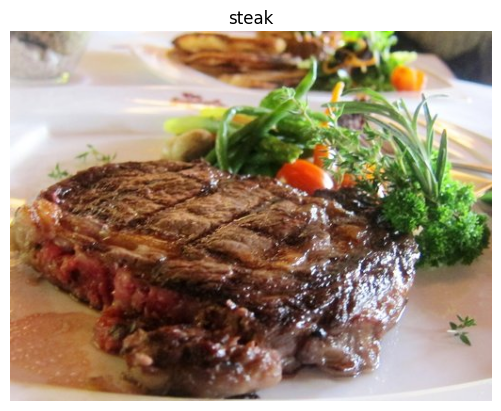

In [ ]:
view_random_image(target_dir='/content/pizza_steak/test', target_class='steak')

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = 'binary',
                                                                 image_size = IMG_SIZE,
                                                                 color_mode ='rgb',
                                                                 batch_size = 32,
                                                                 shuffle = True)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = 'binary',
                                                                 image_size = IMG_SIZE
                                                                )


Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
train_data = train_data.cache('/tmp/train_data').prefetch(buffer_size = tf.data.AUTOTUNE) #temp
test_data = test_data.cache('/tmp/test_data').prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (224,224, 3)),
    tf.keras.layers.Rescaling(1/ 255.),
    tf.keras.layers.Conv2D(filters= 64, kernel_size=7, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters= 128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters= 128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters= 256, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters= 256, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
  ])

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    metrics= ['accuracy']
)

model.fit(train_data,  epochs = 5,
          validation_data = test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 61s 823ms/step - accuracy: 0.5417 - loss: 0.9293 - val_accuracy: 0.7040 - val_loss: 0.6180
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.6348 - loss: 0.6280 - val_accuracy: 0.7680 - val_loss: 0.5247
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.6490 - loss: 0.5988 - val_accuracy: 0.7600 - val_loss: 0.5541
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.6672 - loss: 0.5961 - val_accuracy: 0.7760 - val_loss: 0.4918
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.6892 - loss: 0.5838 - val_accuracy: 0.7600 - val_loss: 0.4702


In [ ]:
model.evaluate(train_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.7663 - loss: 0.4800


[0.4826292395591736, 0.7646666765213013]

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomHeight(0.1),
    tf.keras.layers.RandomWidth(0.1),

])

In [ ]:
# class_names = train_data.class_names
# class_names

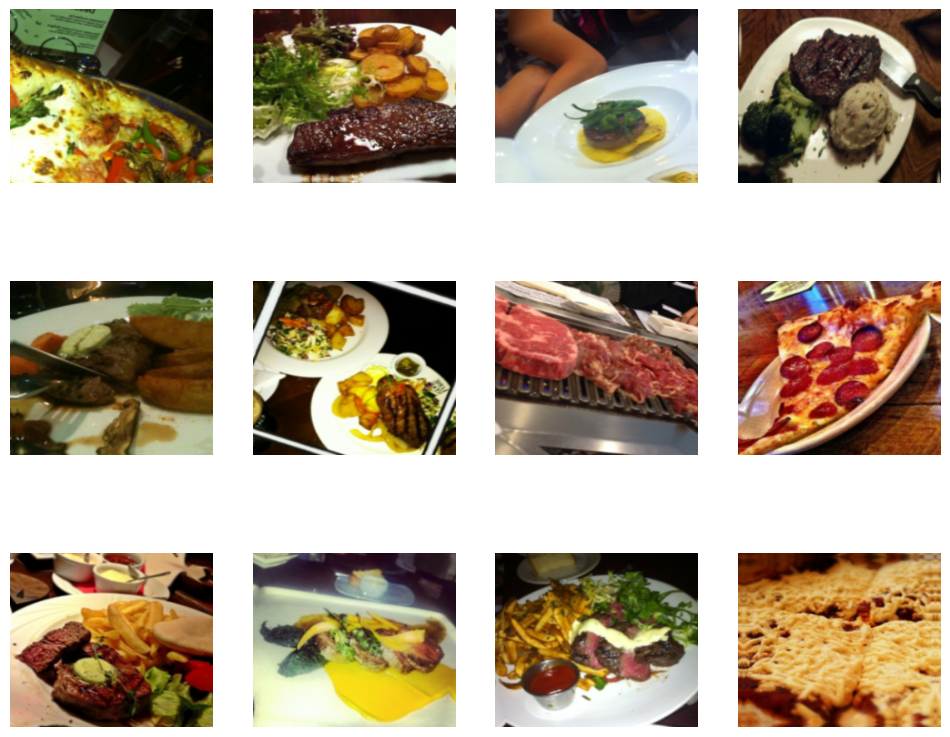

In [ ]:

for images, labels in train_data.take(1):
    augmented_images = data_augmentation(images)
    plt.figure(figsize=(12, 10))
    for i in range(12):
        ax = plt.subplot(3, 4, i+ 1)
        plt.imshow(augmented_images[i].numpy() / 255)
        plt.axis('off')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (224,224, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1/ 255.),
    tf.keras.layers.Resizing(224, 224),
    tf.keras.layers.Conv2D(filters= 64, kernel_size=7, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters= 128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters= 128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters= 256, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters= 256, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
  ])

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer= tf.keras.optimizers.SGD(learning_rate = 0.0003, momentum = 0.9),
              metrics =['accuracy'])

In [ ]:
model.fit(train_data, epochs = 5, validation_data = test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 335ms/step - accuracy: 0.4832 - loss: 0.9537 - val_accuracy: 0.7140 - val_loss: 0.6632
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.5909 - loss: 0.6612 - val_accuracy: 0.7180 - val_loss: 0.6063
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 217ms/step - accuracy: 0.6015 - loss: 0.6583 - val_accuracy: 0.7180 - val_loss: 0.6120
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.6480 - loss: 0.6239 - val_accuracy: 0.7580 - val_loss: 0.5565
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.6531 - loss: 0.6057 - val_accuracy: 0.7480 - val_loss: 0.5399


In [ ]:
inputs = tf.keras.Input(shape = (224, 224, 3))
x = tf.keras.applications.resnet50.preprocess_input(inputs)


base_model = tf.keras.applications.ResNet50(include_top = False, input_tensor = x)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
outputs = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(avg)
model= tf.keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
base_model.trainable = False

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 47,
    decay_rate= 0.96


)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3,
                                                  restore_best_weights = True)

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule, momentum = 0.9),
              metrics = ['accuracy'])


model.fit(train_data, epochs = 15, validation_data = test_data,
          callbacks = early_stopping)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 368ms/step - accuracy: 0.8451 - loss: 0.2941 - val_accuracy: 0.9900 - val_loss: 0.0387
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.9790 - loss: 0.0467 - val_accuracy: 0.9900 - val_loss: 0.0425
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.9903 - loss: 0.0227 - val_accuracy: 0.9900 - val_loss: 0.0440
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9925 - loss: 0.0164 - val_accuracy: 0.9880 - val_loss: 0.0439


In [ ]:
inputs = tf.keras.Input(shape=(224,224, 3))

x = data_augmentation(inputs)

x = tf.keras.applications.resnet50.preprocess_input(x)

base_model = tf.keras.applications.ResNet50(include_top = False, weights = 'imagenet',
                                            input_tensor = x)

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

outputs = tf.keras.layers.Dense(units =1 , activation ='relu')(x)

model = tf.keras.Model(inputs = inputs , outputs = outputs)


In [ ]:
base_model.trainable = False


In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 47,
    decay_rate= 0.96


)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3,
                                                  restore_best_weights = True)

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule, momentum = 0.9),
              metrics = ['accuracy'])


model.fit(train_data, epochs = 15, validation_data = test_data,
          callbacks = early_stopping)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 679ms/step - accuracy: 0.4843 - loss: 7.8984 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 412ms/step - accuracy: 0.5017 - loss: 8.0317 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 329ms/step - accuracy: 0.5017 - loss: 8.0317 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 290ms/step - accuracy: 0.5017 - loss: 8.0317 - val_accuracy: 0.5000 - val_loss: 8.0590
